## Simulating 4-Tank Process: No Controllers

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from FourTankSystem import QuadTankSystem

### Building the Model
----

![image](4-tank-schematic.png)

The general derivation of the system of equations have the form 

$$\text{Accumulated = influx } - \text{ Outflux }+ (\underset{\text{(Generated)}}{\text{Produced }-\text{ Consumed}})$$
For non-reactive systems, the generation term is absent
$$\text{Accumulated} = \text{Influx}-\text{Outflux}$$

#### **Tank 1**

$$\text{Accumulated} = \text{Influx}-\text{Outflux}$$
with,
$$\begin{align}
\text{Accumulated} &= m_{1}(t+\Delta t)-m_{1}\left( t \right) \\
\text{Influx} &= \rho q_{1, in}\left( t \right) \Delta t + \rho q_{3}\left( t \right) \Delta t \\
\text{Outflux} &= \rho q_{1}\left( t \right) \Delta t
\end{align}$$
Therefore, 
$$ \begin{align}
m_{1}(t+\Delta t)-m_{1}\left( t \right) &= \rho q_{1, in}\left( t \right) \Delta t + \rho q_{3}\left( t \right) \Delta t - \rho q_{1}\left( t \right) \Delta t \\
&= \rho \Delta t \left( q_{1, in}\left( t \right)  +  q_{3}\left( t \right) - q_{1}\left( t \right) \right) \\
\implies \frac{m_{1}(t+\Delta t)-m_{1}\left( t \right)}{\Delta t} &= \rho \left( q_{1, in}\left( t \right)  +  q_{3}\left( t \right) - q_{1}\left( t \right) \right)
\end{align}$$
Let $\Delta t \rightarrow 0$ 
$$\frac{d m_{1} \left( t \right)}{d t} = \rho \left( q_{1, in}\left( t \right)  +  q_{3}\left( t \right) - q_{1}\left( t \right) \right)$$

#### Entire System

**Mass Balances:**
$$\begin{align}
\frac{d m_{1} \left( t \right)}{d t} &= \rho \left( q_{1, in}\left( t \right)  +  q_{3}\left( t \right) - q_{1}\left( t \right) \right), \quad m_{1}\left( t_{0} \right)=m_{1,0}\\
\frac{d m_{2} \left( t \right)}{d t} &= \rho \left( q_{2,in} (t) + q_{4} (t) - \rho q_{2}(t) \right), \quad m_{2}\left( t_{0} \right)=m_{2,0} \\
\frac{d m_{3} \left( t \right)}{d t} &= \rho \left( q_{3, in}\left( t \right) - q_{3}\left( t \right) \right), \quad m_{3}\left( t_{0} \right)=m_{3,0} \\
\frac{d m_{4} \left( t \right)}{d t} &= \rho \left( q_{4, in}\left( t \right) - q_{4}\left( t \right) \right), \quad m_{4}\left( t_{0} \right)=m_{4,0}
\end{align}$$
**Inflows:**
$$\begin{align}
q_{1, in}(t) &= \gamma_{1}F_{1}(t), \quad q_{2, in}(t) = \gamma_{2}F_{2}(t) \\
q_{3, in}(t) &= (1-\gamma_{2})F_{2}(t), \quad q_{4, in}(t) = (1-\gamma_{1})F_{1}(t) 
\end{align}$$
**Outflows:**

$$q_{i}(t)=a_{i}\sqrt{2 g h_{i}(t)}, \quad h_{i}(t)=\frac{m_{i}(t)}{\rho A_{i}}, \quad i \in \left\{ 1,2,3,4 \right\}$$
Where the variables are:
- $A_{i}:$ Cross-sectional area of tank $i$
- $h_{i}:$ Water height of tank $i$
- $a_{i}:$ Cross-sectional area of outlet of tank $i$
- $\gamma_{i}:$ Proportion of flow being directed to tank $i$.


In [14]:
# ------------------------------------------------------------
#  Parameter values
# ------------------------------------------------------------

a1 = 1.2272     #[cm2] Area of outlet pipe 1
a2 = 1.2272    #[cm2] Area of outlet pipe 2
a3 = 1.2272     #[cm2] Area of outlet pipe 3
a4 = 1.2272     #[cm2] Area of outlet pipe 4
A1 = 380.1327   #[cm2] Cross sectional area of tank 1
A2 = 380.1327   #[cm2] Cross sectional area of tank 2
A3 = 380.1327   #[cm2] Cross sectional area of tank 3
A4 = 380.1327   #[cm2] Cross sectional area of tank 4
A = np.array([A1, A2, A3, A4])
g = 981         #[cm/s2] The acceleration of gravity
gamma1 = 0.45  # Flow distribution constant. Valve 1
gamma2 = 0.40  # Flow distribution constant. Valve 2
rho=1.00 # [g/cm3] Density of water 

# Collect parameters in a vector

p = {'a': np.array([a1, a2, a3, a4]), 'A': np.array([A1, A2, A3, A4]), 'g': g, 'gamma': np.array([gamma1, gamma2]), 'rho': rho}

# ------------------------------------------------------------
# Initial Conditions
# ------------------------------------------------------------

m10 = 0.0          # [g] Liquid mass in tank 1 at time t0
m20 = 0.0          # [g] Liquid mass in tank 2 at time t0
m30 = 0.0          # [g] Liquid mass in tank 3 at time t0
m40 = 0.0          # [g] Liquid mass in tank 4 at time t0
x0 = np.array([m10, m20, m30, m40]) # Initial conditions
F1 = 300           # [cm3/s] Flow rate from pump 1
F2 = 300           # [cm3/s] Flow rate from pump 2

# ------------------------------------------------------------
# Time
# ------------------------------------------------------------

N = 60 # Number of minutes to simulate
t0 = 0.0        # [s] Initial time
tf = N*60         # [s] Final time
t= np.linspace(t0,tf,N)

# ------------------------------------------------------------
# Initialising QuadTankSystem
# ------------------------------------------------------------

fourTankSys = QuadTankSystem(p)
fourTankSys.set_initial_condition(x0)

##### The Generic Input-Output Model

$$\begin{align}
\frac{d x (t)}{dt} &= f(x(t), u(t), p), \quad x(t_{0})=x_{0} \quad \text{(Process Model)} \\
y(t) &= f(x(t), p), \quad \text{(Sensor function)}\\
z(t) &= h(x(t), p), \quad \text{(Output function)}
\end{align}$$
###### Sensor Function

These are sensors measuring the level/height of all the tanks.
$$y = \begin{bmatrix} y_{1}\\ y_{2} \\ y_{3}\\ y_{4} \end{bmatrix} = \begin{bmatrix} h_{1}\\ h_{2}\\ h_{3}\\ h_{4} \end{bmatrix} = \begin{bmatrix} \frac{m_{1}}{\rho A_{1}}\\ \frac{m_{2}}{\rho A_{2}}\\ \frac{m_{3}}{\rho A_{3}}\\ \frac{m_{4}}{\rho A_{4}}\\ \end{bmatrix} = g \left( x, p \right)$$
###### Output Function

In this case, we will consider the output as the level in tank $1$ and tank $2$. 
$$z = \begin{bmatrix} z_{1}\\ z_{2} \end{bmatrix} = \begin{bmatrix} h_{1}\\ h_{2} \end{bmatrix} = \begin{bmatrix} \frac{m_{1}}{\rho A_{1}}\\ \frac{m_{2}}{\rho A_{2}} \end{bmatrix} = h(x, p)$$

In [15]:
# ------------------------------------------------------------
# Initialising the State (mass), Sensor (all heights),
# Output (two heights) vectors and the input (flow rates) vector
# ------------------------------------------------------------
x = np.zeros((4,N))
x[:,0] = x0

y = np.zeros((4,N))
y[:,0] = fourTankSys.system_sensor(x0)

z = np.zeros((2,N))
z[:,0] = fourTankSys.system_output(x0) # Only the first two heights are measured

u = np.zeros((2,N))
u[:,0] = np.array([[F1,F2]])

print(f"Initial state: {x[:, 0]}")
print(f"Initial sensor: {y[:, 0]}")
print(f"Initial output: {z[:, 0]}")
print(f"Initial input: {u[:, 0]}")

Initial state: [0. 0. 0. 0.]
Initial sensor: [0. 0. 0. 0.]
Initial output: [0. 0.]
Initial input: [300. 300.]


### Continuous-Time Simulation 
----
We begin by simulating the system in a continuous time manner.

We use the **Mass balance** equations constructed in the model building phase. 

In [16]:
[t0, tf], x0, u[:,0]

([0.0, 3600], array([0., 0., 0., 0.]), array([300., 300.]))

In [17]:
sol = integrate.solve_ivp(fourTankSys.process, [t0, tf], x0,method='BDF', args=([u[:,0]]))
# Note - args is annoying to work with
sol.t[0], sol.t[-1]

(0.0, 3600.0)

#### Plotting results

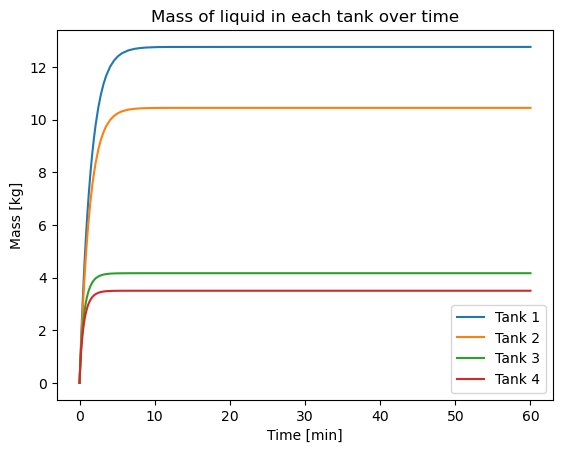

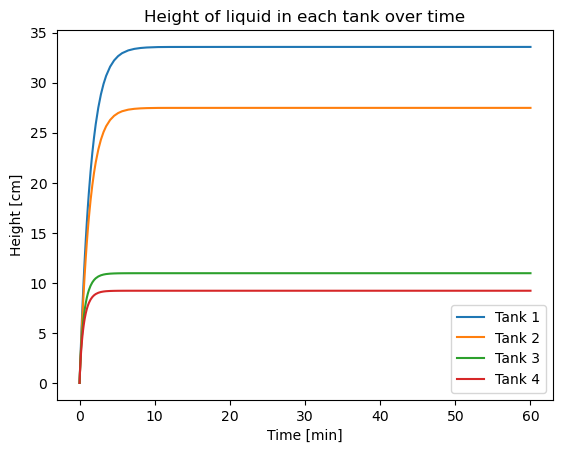

In [18]:
# mass
plt.plot(sol.t/60, (sol.y).T/1000)
plt.xlabel('Time [min]')
plt.ylabel('Mass [kg]')
plt.title('Mass of liquid in each tank over time')
plt.legend(['Tank 1', 'Tank 2', 'Tank 3', 'Tank 4'])
plt.show()

# height
H = np.zeros((4, len(sol.t)))
for i in range(len(sol.t)):
    # H[:, i] = (X[:, i])/(rho*A)
    H[:, i] = fourTankSys.system_sensor(sol.y[:, i])
plt.plot(sol.t/60, H.T)
plt.xlabel('Time [min]')
plt.ylabel('Height [cm]')
plt.title('Height of liquid in each tank over time')
plt.legend(['Tank 1', 'Tank 2', 'Tank 3', 'Tank 4'])
plt.show()

### Discrete-Time Simulation

In [19]:
X_d, T_d = np.zeros((4,1)), np.array([0])

for k in range(0, N-1):
    # Now using large arrays for storing historical data
    y[:, k] = fourTankSys.system_sensor(x[:, k]) 
    z[:, k] = fourTankSys.system_output(x[:, k])
    u[:, k] = np.array([[F1, F2]]) # Assuming that flow rates are constant
    sol = integrate.solve_ivp(fourTankSys.process, [t[k], t[k+1]], x[:, k], method='BDF', args=([u[:, k]]))
    x[:, k+1] = sol.y[:, -1]
    X_d = np.append(X_d, x[:, k+1].reshape(4,1), axis=1)
    T_d = np.append(T_d, sol.t[-1])
    
k = N-1
y[:, k] = fourTankSys.system_sensor(x[:, k])
z[:, k] = fourTankSys.system_output(x[:, k])


In [20]:
T_d.shape, X_d.shape

((60,), (4, 60))

#### Plotting Discrete-time results

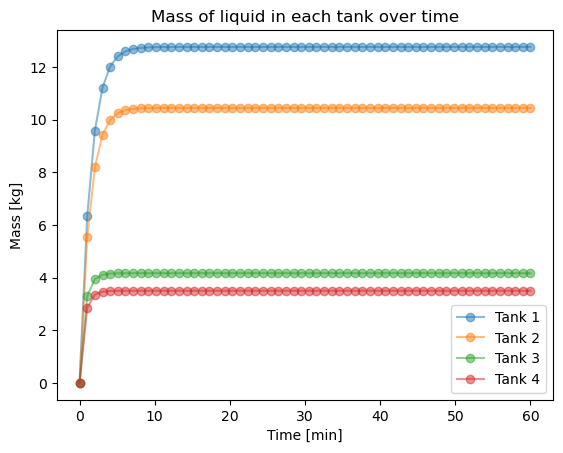

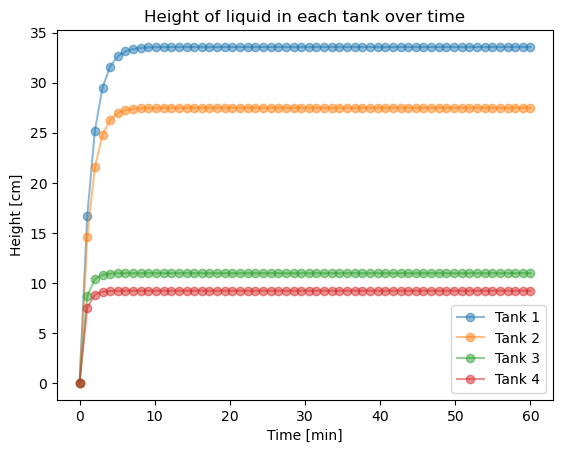

Final state: [12765.17113991 10449.49383562  4168.21914773  3502.46192274]
Final sensor: [33.58082885 27.48906852 10.9651686   9.21378751]


In [21]:
plt.plot(T_d/60, X_d.T/1000, linestyle='-', marker='o', alpha=0.5)
plt.xlabel('Time [min]')
plt.ylabel('Mass [kg]')
plt.title('Mass of liquid in each tank over time')
plt.legend(['Tank 1', 'Tank 2', 'Tank 3', 'Tank 4'])
plt.show()

plt.plot(T_d/60, y.T, linestyle='-', marker='o', alpha=0.5)
plt.xlabel('Time [min]')
plt.ylabel('Height [cm]')
plt.title('Height of liquid in each tank over time')
plt.legend(['Tank 1', 'Tank 2', 'Tank 3', 'Tank 4'])
plt.show()

print(f"Final state: {x[:, -1]}")
print(f"Final sensor: {y[:, -1]}")

#### Discrete-Time Simulation, with varying flow rates

In [22]:
X_d, T_d = np.zeros((4,1)), np.array([0])

for k in range(0, N-1):
    # Now using large arrays for storing historical data
    y[:, k] = fourTankSys.system_sensor(x[:, k]) 
    z[:, k] = fourTankSys.system_output(x[:, k])
    u[:, k] = np.array([[np.random.normal(300,30), np.random.normal(300,30)]]) # random flow rates
    sol = integrate.solve_ivp(fourTankSys.process, [t[k], t[k+1]], x[:, k], method='BDF', args=([u[:, k]]))
    x[:, k+1] = sol.y[:, -1]
    X_d = np.append(X_d, x[:, k+1].reshape(4,1), axis=1)
    T_d = np.append(T_d, sol.t[-1])
    
k = N-1
y[:, k] = fourTankSys.system_sensor(x[:, k])
z[:, k] = fourTankSys.system_output(x[:, k])

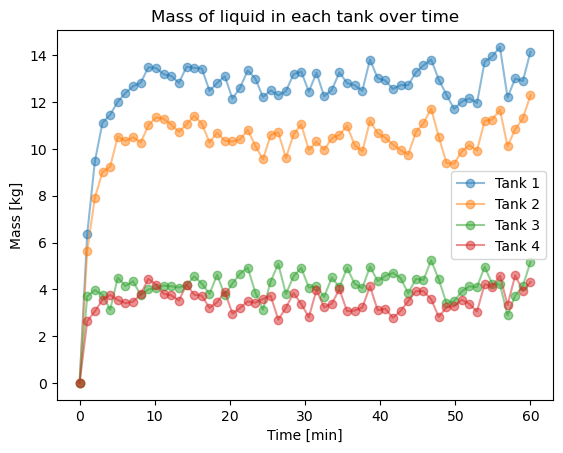

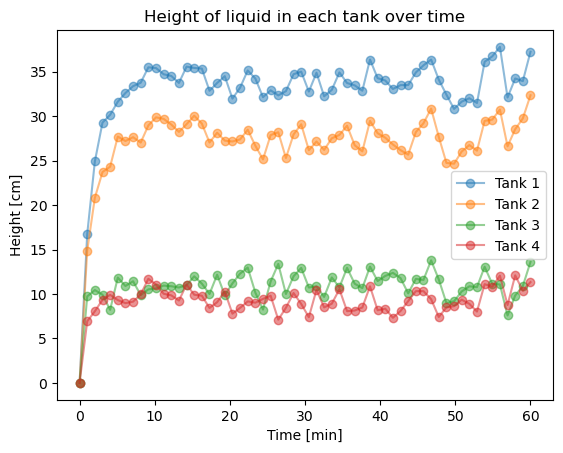

In [23]:
plt.plot(T_d/60, X_d.T/1000, linestyle='-', marker='o', alpha=0.5)
plt.xlabel('Time [min]')
plt.ylabel('Mass [kg]')
plt.title('Mass of liquid in each tank over time')
plt.legend(['Tank 1', 'Tank 2', 'Tank 3', 'Tank 4'])
plt.show()

plt.plot(T_d/60, y.T, linestyle='-', marker='o', alpha=0.5)
plt.xlabel('Time [min]')
plt.ylabel('Height [cm]')
plt.title('Height of liquid in each tank over time')
plt.legend(['Tank 1', 'Tank 2', 'Tank 3', 'Tank 4'])
plt.show()


##### Plotting flow rates

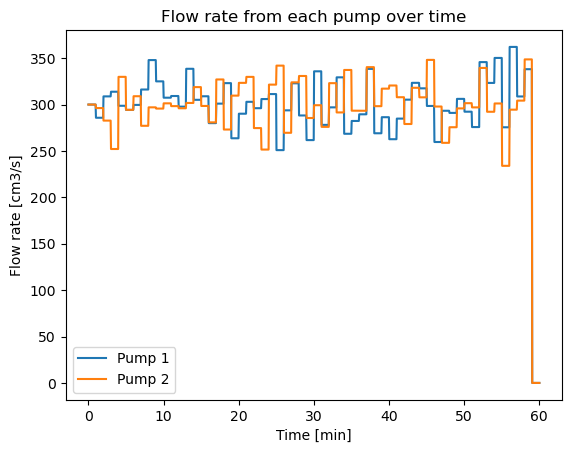

In [24]:
# Filling in values for flow rates across t
U = np.zeros((2, 20*N))
U[:, 0:20] = np.array([F1, F2]).reshape(2,1)*np.ones((2, 20))
t_U = np.linspace(0, 3600, 1200)
for i in range (1, N-1):
    U[:, 20*i:20*(i+1)] = u[:, i].reshape(2,1)*np.ones((2, 20))

plt.plot(t_U/60, U[0,:], label='Pump 1')
plt.plot(t_U/60, U[1,:], label='Pump 2')
plt.xlabel('Time [min]')
plt.ylabel('Flow rate [cm3/s]')
plt.title('Flow rate from each pump over time')
plt.legend()
plt.show()



# plt.plot(t/60, u[0,:], label='Pump 1')
# plt.plot(t/60, u[1,:], label='Pump 2')
# plt.xlabel('Time [min]')
# plt.ylabel('Flow rate [cm3/s]')
# plt.title('Flow rate from each pump over time')
# plt.legend()
# plt.show()